Сравнение нескольких выборок. Новиков Дмитрий. Вариант "Japan Vietnam China".

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
data = pd.read_csv("ramen-ratings.csv")
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
def my_countries(x):
    if 'Japan'in str(x) or 'Vietnam' in str(x) or 'China' in str(x):
        return True
    return False

In [4]:
my_countries = data.groupby(data.apply(lambda x: my_countries(x['Country']), axis = 1))
my_countries.groups

{False: [1, 2, 3, 4, 5, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 47, 50, 52, 54, 56, 57, 59, 60, 61, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 106, 108, 109, 110, 111, 113, 114, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, ...], True: [0, 6, 7, 8, 13, 18, 27, 33, 34, 38, 46, 48, 49, 51, 53, 55, 58, 62, 63, 64, 66, 75, 77, 100, 105, 107, 112, 115, 119, 121, 139, 140, 143, 145, 147, 151, 153, 160, 161, 162, 164, 165, 174, 179, 182, 185, 187, 192, 196, 208, 209, 218, 221, 222, 225, 226, 227, 232, 252, 257, 258, 260, 264, 275, 278, 283, 285, 286, 288, 291, 293, 297, 300, 302, 305, 309, 315, 317, 319, 325, 328, 333, 343, 344, 348, 350, 352, 354, 359, 366, 367, 374, 385, 390, 394, 395, 414, 417, 420, 423, ...]}

In [5]:
my_countries_2 = my_countries.get_group(True)
my_countries_2

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.5,NaN
...,...,...,...,...,...,...,...
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5,2012 #4
2568,12,Sapporo Ichiban,Shrimp Flavor,Pack,Japan,2.5,NaN
2573,7,Ve Wong,Mushroom Pork,Pack,Vietnam,1,NaN
2574,6,Vifon,Nam Vang,Pack,Vietnam,2.5,NaN


In [6]:
def rated(x):
    if 'Unrated' in str(x):
        return False
    return True

In [7]:
my_countries_3 = my_countries_2.groupby(my_countries_2.apply(lambda x: rated(x['Stars']), axis = 1))
my_countries_3.groups

{True: [0, 6, 7, 8, 13, 18, 27, 33, 34, 38, 46, 48, 49, 51, 53, 55, 58, 62, 63, 64, 66, 75, 77, 100, 105, 107, 112, 115, 119, 121, 139, 140, 143, 145, 147, 151, 153, 160, 161, 162, 164, 165, 174, 179, 182, 185, 187, 192, 196, 208, 209, 218, 221, 222, 225, 226, 227, 232, 252, 257, 258, 260, 264, 275, 278, 283, 285, 286, 288, 291, 293, 297, 300, 302, 305, 309, 315, 317, 319, 325, 328, 333, 343, 344, 348, 350, 352, 354, 359, 366, 367, 374, 385, 390, 394, 395, 414, 417, 420, 423, ...]}

In [8]:
my_countries_3 = my_countries_3.get_group(True)
my_countries_3

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.5,NaN
...,...,...,...,...,...,...,...
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5,2012 #4
2568,12,Sapporo Ichiban,Shrimp Flavor,Pack,Japan,2.5,NaN
2573,7,Ve Wong,Mushroom Pork,Pack,Vietnam,1,NaN
2574,6,Vifon,Nam Vang,Pack,Vietnam,2.5,NaN


In [9]:
my_countries_3['Stars']= my_countries_3.apply(lambda x: float(x['Stars']), axis = 1)

In [10]:
my_countries_3['Stars']

0       3.75
6       4.00
7       3.75
8       0.25
13      4.50
        ... 
2567    5.00
2568    2.50
2573    1.00
2574    2.50
2575    3.50
Name: Stars, Length: 629, dtype: float64

In [11]:
#my_countries_3['Stars']= my_countries_3.apply(lambda x: (x['Stars'] + 1) * 100, axis = 1)

In [12]:
#my_countries_3['Stars']

In [13]:
#my_countries_3['Stars']= my_countries_3.apply(lambda x: np.log(x['Stars']), axis = 1)

In [14]:
#my_countries_3['Stars']

In [15]:
#my_countries_3.groupby('Country').groups

Чтобы прикинуть, какой разброс и можно ли надеяться на равенство дисперсий, построим "ящики с усами" :

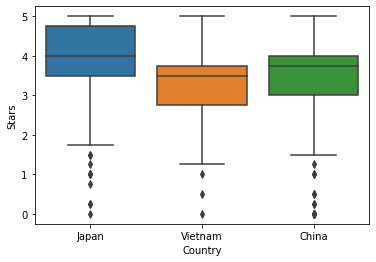

In [16]:
sns.boxplot( y=my_countries_3['Stars'], x=my_countries_3['Country'] );
plt.show()

## Тест Шапиро-Уилка

The Shapiro-Wilk test tests the null hypothesis that a sample $x_{1}, \ldots, x_{n}$ came from a normally distributed population. The test statistic is
$$
W=\frac{\left(\sum_{i=1}^{n} a_{i} x_{(i)}\right)^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}},
$$
where
- $x_{(i)}$ (with parentheses enclosing the subscript index $i$; not to be confused with $x_{i}$ ) is the ith order statistic, i.e., the ith-smallest number in the sample;
- $\bar{x}=\left(x_{1}+\cdots+x_{n}\right) / n$ is the sample mean.
The coefficients $a_{i}$ are given by: ${ }^{[1]}$
$$
\left(a_{1}, \ldots, a_{n}\right)=\frac{m^{\top} V^{-1}}{C},
$$
where $C$ is a vector norm: ${ }^{[2]}$
$$
C=\left\|V^{-1} m\right\|=\left(m^{\top} V^{-1} V^{-1} m\right)^{1 / 2}
$$
and the vector $m$,
$$
m=\left(m_{1}, \ldots, m_{n}\right)^{\top}
$$ normal order statistics. ${ }^{[3]}$
There is no name for the distribution of $W$. The cutoff values for the statistics are calculated through Monte Carlo simulations. ${ }^{\text {[2] }}$

Симуляции Монте-Карло — это процесс многократной генерации случайных выборок и оценки различных параментров по ним

Проверяем выборки на нормальность с помощью теста Шапиро-Уилка. Работает корректно только для выборок объема меньше 5000, что для нас выполняется.

In [17]:
stats.shapiro(my_countries_3['Stars'][my_countries_3['Country'] == 'Japan'])

ShapiroResult(statistic=0.8806263208389282, pvalue=6.7338621674860365e-16)

In [18]:
stats.shapiro(my_countries_3['Stars'][my_countries_3['Country'] == 'Vietnam'])

ShapiroResult(statistic=0.9088996052742004, pvalue=1.7547490642755292e-06)

In [19]:
stats.shapiro(my_countries_3['Stars'][my_countries_3['Country'] == 'China'])

ShapiroResult(statistic=0.8518049120903015, pvalue=8.52160269432245e-12)

<br>Все выборки НЕ нормальны, значит, применяем тест Левене на равенство дисперсий:

In [20]:
stats.levene(my_countries_3['Stars'][my_countries_3['Country'] == 'Japan'],
             my_countries_3['Stars'][my_countries_3['Country'] == 'Vietnam'],
             my_countries_3['Stars'][my_countries_3['Country'] == 'China'])


LeveneResult(statistic=2.1489473926207836, pvalue=0.11746627262932828)

В результате дисперсии РАВНЫ.

## Тест Краскела-Уоллиса:

Заданы $k$ выборок:
$$
x_{1}^{n_{1}}=\left\{x_{11}, \ldots, x_{1 n_{1}}\right\}, \ldots, x_{k}^{n_{k}}=\left\{x_{k 1}, \ldots, x_{k n_{k}}\right\} .
$$
Объединённая выборка будет иметь вид:
$$
x=x_{1}^{n_{1}} \cup x_{2}^{n_{2}} \cup \ldots \cup x_{k}^{n_{k}} .
$$
Дополнительные предположения:
1. все выборки простые, объединённая выборка независима;
2. выборки взяты из неизвестных непрерывных распределений $F_{1}(x), \ldots, F_{k}(x)$.
Проверяется нулевая гипотеза $H_{0}: F_{1}(x)=\ldots=F_{k}(x)$ при альтернативе $H_{1}: F_{1}(x)=F_{2}\left(x-\Delta_{1}\right)=\ldots=F_{k}\left(x-\Delta_{k-1}\right)$.
Упорядочим все $N=\sum_{i=1}^{k} n_{i}$ элементов выборок по возрастанию и обозначим $R_{i j}$ ранг $j$-го элемента $i$-й выборки в полученном вариационном ряду.
Статистика критерия Краскела - Уоллиса для проверки гипотезы о наличии сдвига в параметрах положения двух сравниваемых выборок имеет вид:
$$
\begin{aligned}
H &=\sum_{i=1}^{k}\left(1-\frac{n_{i}}{N}\right)\left\{\frac{\bar{R}_{i}-\frac{N+1}{2}}{\sqrt{\frac{\left(N-n_{i}\right)(N+1)}{12 n_{i}}}}\right\}^{2}=\frac{12}{N(N+1)} \sum_{i=1}^{k} n_{i}\left(\bar{R}_{i}\right.\\
&=\frac{12}{N(N+1)} \sum_{i=1}^{k} \frac{R_{i}^{2}}{n_{i}}-3(N+1)
\end{aligned}
$$
где
$$
\begin{aligned}
R_{i} &=\sum_{j=1}^{n_{i}} R_{i j} \\
\bar{R}_{i} &=\frac{1}{n_{i}} R_{i}
\end{aligned}
$$ различные аппроксимации.


In [21]:
stats.kruskal(my_countries_3['Stars'][my_countries_3['Country'] == 'Japan'],
             my_countries_3['Stars'][my_countries_3['Country'] == 'Vietnam'],
             my_countries_3['Stars'][my_countries_3['Country'] == 'China'])

KruskalResult(statistic=87.33375463239707, pvalue=1.0857157540910362e-19)

Гипотезу об однородности выборок отвергаем, - значит, применяем апостериорные (post hoc) тесты.

## Тест Данна
$H_{012}:$ 'Japan' = 'Vietnam', $\alpha = 0,05$<br>
$H_{013}:$ 'Japan' = 'China', $\alpha = 0,05$<br>
$H_{023}:$ 'Vietnam' = 'China', $\alpha = 0,05$<br>
$H_{0ij}$ отвергается, на уровне значимости $\alpha$, если 
$$|\overline{R_{i\cdot}} - \overline{R_{j\cdot}} |>z_{\alpha/k(k-1)}\sqrt{\frac{N(N+1)}{12}\Bigl(\frac{1}{n_i}+\frac{1}{n_j}\Bigr)}$$
 Значение $p_{value}$ вычисляется так:
 $$
 p_{value} = k(k-1)\cdot\mathsf{P}\left(N(0,1)> \frac{|\overline{R_{i\cdot}} - \overline{R_{j\cdot}} |}{\sqrt{\frac{N(N+1)}{12}\Bigl(\frac{1}{n_i}+\frac{1}{n_j}\Bigr)}}\right)
 $$
 
Вероятность того, что хотя бы для одной пары мы совершим ошибку 1 рода:


In [22]:
FWER = 1-(1-0.05)**(3)
FWER

0.1426250000000001

FWER - вероятность отвергнуть хотя бы одну $H_{0ij}$, когда все средние равны.

FWER нужно фиксировать при post hoc тестах!<br><br>

Тест Данна:

In [23]:
pip install scikit_posthocs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: patsy>=0.5.2 in d:\anaconda3\lib\site-packages (from statsmodels->scikit_posthocs) (0.5.2)



In [24]:
import scikit_posthocs as sph

In [25]:
sph.posthoc_dunn([my_countries_3['Stars'][my_countries_3['Country'] == 'Japan'],
             my_countries_3['Stars'][my_countries_3['Country'] == 'Vietnam'],
                 my_countries_3['Stars'][my_countries_3['Country'] == 'China']], p_adjust='fdr_bh')

,1,2,3
1,1.000000e+00,9.518063e-18,2.147456e-08
2,9.518063e-18,1.000000e+00,5.282673e-04
3,2.147456e-08,5.282673e-04,1.000000e+00


Все три выборки попарно отличаются в контексте гипотезы!

Рассмотрим что-нибудь для дискретной (изначальной)  модели:

In [26]:
my_countries_4 = my_countries_2.groupby(my_countries_2.apply(lambda x: rated(x['Stars']), axis = 1))
my_countries_4 = my_countries_4.get_group(True)
my_countries_4['Stars']= my_countries_4.apply(lambda x: float(x['Stars']), axis = 1)

In [27]:
my_countries_4['Stars']

0       3.75
6       4.00
7       3.75
8       0.25
13      4.50
        ... 
2567    5.00
2568    2.50
2573    1.00
2574    2.50
2575    3.50
Name: Stars, Length: 629, dtype: float64

Создадим таблицу сопряженности:

In [28]:
my_countries_4_crosstab = pd.crosstab(my_countries_4['Stars'], 
                                      my_countries_4['Country'],  
                                                   margins = False) 
print(my_countries_4_crosstab) 

Country  China  Japan  Vietnam
Stars                         
0.000        6      1        1
0.250        2      2        0
0.500        2      0        1
0.750        0      1        0
1.000        2      3        1
1.250        1      1        3
1.500        3      2        1
1.750        4      1        1
2.000        3      5        5
2.250        1      2        2
2.300        1      0        0
2.500        2      6        4
2.750        5      7        9
2.800        0      0        1
3.000       13     21       12
3.250        8     14       11
3.500       22     30       21
3.750       28     38       19
3.800        0      2        0
4.000       28     57        9
4.125        0      1        0
4.250       14     27        4
4.300        0      1        0
4.500       11     33        1
4.750        1     23        1
5.000       12     74        1


Теперь применяем Хи-квадрат тест:

In [29]:
sp.stats.chi2_contingency(my_countries_4_crosstab)

(140.59209729864915,
 1.51804320938834e-10,
 50,
 array([[ 2.14944356,  4.47694754,  1.3736089 ],
        [ 1.07472178,  2.23847377,  0.68680445],
        [ 0.80604134,  1.67885533,  0.51510334],
        [ 0.26868045,  0.55961844,  0.17170111],
        [ 1.61208267,  3.35771065,  1.03020668],
        [ 1.34340223,  2.79809221,  0.85850556],
        [ 1.61208267,  3.35771065,  1.03020668],
        [ 1.61208267,  3.35771065,  1.03020668],
        [ 3.49284579,  7.27503975,  2.23211447],
        [ 1.34340223,  2.79809221,  0.85850556],
        [ 0.26868045,  0.55961844,  0.17170111],
        [ 3.22416534,  6.7154213 ,  2.06041335],
        [ 5.64228935, 11.75198728,  3.60572337],
        [ 0.26868045,  0.55961844,  0.17170111],
        [12.35930048, 25.74244833,  7.89825119],
        [ 8.86645469, 18.46740859,  5.66613672],
        [19.6136725 , 40.85214626, 12.53418124],
        [22.83783784, 47.56756757, 14.59459459],
        [ 0.53736089,  1.11923688,  0.34340223],
        [25.25596184

$p_{value}$ маленькое, оценки в трёх странах НЕоднородны.